5기 조현성

#3장

##Languagel Model 은 단어 시컨스(문장)에 확률을 할당하는 모델을 말함.  

# 3장에서는 통계의 기반한 전통적 언어 모델(statistical Languagel Model,SLM)에 대헤 학습  
{통계 기반 SLM은 자연어에 근사하기에는 한계가 있어 요즘은 인공 신경망을 많이 사용함}

-보편적인 유형 이전 단어들이 주어졌을 때 다음 단어를 예측.  
-다른 유형은 앞 뒤 단어들이 주어졌을 때 중간의 있는 단어를 예측.  

언어 모델링은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업 언어모델이 다음단어를 예측하게 하는 작업이 언어 모델  

언어모델은 확률을 통해 보다 적절한 문장을 판단한다.  


조건부 확률이 사용됨.

충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를
 sparsity problem 라고 한다. 이를 해결하기 위해 n-gram 언어 모델이나 스무딩, 백오프같은 일반화 기법이 존재하지만 결국 근본적인 해결책이 되어주지 못해 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 된다.  

 n-gram LM은 이전과는 달리 n개의 단어만 고려하여 접근 하는 방법이다.  

 n-gram Laguage MModel의 한계  
  1.희소 문제 : 줄어들기는 하지만 사라지진 않는다.  
  2.n을 선택하는 것은 trade-off 의 문제.n이 1에서 2로 늘어나는것은 성능을 높이지만 n을 크게 하면 결국 희소 문제는 점점 심해진다.  

  4. 적용 Domain에 맞는 코퍼스를 수집  


  한국어에서의 언어 모델  
  한국어는 정~말 까다롭다  

  이유 1. 한국어는 어순이 중요하지 않다.  
  이유 2. 한국어는 교착어이다. ->한국어에서는 토큰화를 통해 접사 조사를 분리하는것이 중요한 작업이 되기도 함.  
  이유 3. 한국어는 띄어쓰기가 제대로 지켜지지 않음.

  perplexity,PPL

  ->헷갈리는 정도 (즉 낮을수록 좋은 모델)
  필요성:여러개의 모델의 성능을 비교하는것은 너무 오랜 시간이 걸림  
  ppl이 10이 나왔다면 다음의 나올 단어를 고민할때 평균 10개정도 사이에서 고민했다고 볼 수 있다.  
  ->하지만 이것이 테스트 케이스 상에서 높은 정확도이지 사람이 느끼기에는 아닐수도 있다


#4장 카운터 기반의 단어 표현

**4. 카운트 기반 표현**  

단어의 표현 방법:1. Local Representation 2. Distributed Representation  
Local은 단어 그 자체만 보고 특정값을 맵핑하여 표현하는 방법  
Distributed는 단어를 표현하고자 주변을 참고하여 단어를 표현 하는 방법
Local 을 Discrete라고하고 Distributed는 Continuous라고도 한다.

학습 할것: bag of Words 라는 Local Representation에 있는 단어의 빈도수 카운트하여 단어를 수치화하는 단어표현법을 익힌다. 그리고 BoW와 그 확장인 DTM에 대해서 학습 그리고 이러한 빈도수 기반 단어 표현에 단어 중요도에 따른 가중치를 줄 수 있는 TF-IDF에 대해 학습

BoW는 순서 고려 x 빈도에만 집중  
BoW를 만드는 과정  
(1) 각 단어에 고유한 정수 인덱스를 부여  
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

In [ ]:
!pip install konlpy


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  #온점 제거 및 형태소 분석
  document=document.replace('.','')
  tokenized_document=okt.morphs(document)#형태소 단위로 문장을 잘라 리스트 생성

  word_to_index={}
  bow=[]

  for word in tokenized_document:
    if word not in word_to_index.keys():
      word_to_index[word]=len(word_to_index)
      bow.insert(len(word_to_index)-1,1)
    else:
      index=word_to_index.get(word)
      bow[index]=bow[index]+1

  return word_to_index,bow

In [ ]:
doc1="정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab,bow=build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :',bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
doc2="소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.."
vocab,bow=build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :',bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
doc3=doc1+' '+doc2
vocab,bow=build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :',bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


ConutVectorizer 클래스로 bow 만들기

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus= ['you know I want your love. because I love you.']
vector=CountVectorizer()

print('bag of wordsd vector :', vector.fit_transform(corpus).toarray())
print('vocabulary :',vector.vocabulary_)

bag of wordsd vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


I가 사라진것을 볼수 있는데 CountVectorizer에서는 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문이다.  
띄어쓰기를 기준으로 하는 낮은수준에 토큰화를 한다.  
->물가상승률과 와 물가상승률은 의 차이를 인식하지 못함

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#사용자가 직접 정의한 불용어 사용

text=["Family is not an important thing. it's everything."]
vect=CountVectorizer(stop_words=["the","a","an","not"])
print('bow vector:',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bow vector: [[1 1 1 1 1 1]]
vocabulary : {'family': 1, 'is': 3, 'important': 2, 'thing': 5, 'it': 4, 'everything': 0}


In [ ]:
text=["Family is not an important thing. it's everything."]
vect=CountVectorizer(stop_words="english")
print('bow vector:',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)


bow vector: [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text=["Family is not an important thing. it's everything."]
stop_words=stopwords.words("english")
vect=CountVectorizer(stop_words=stop_words)
print('bow vector:',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bow vector: [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


###4.3 DTM (Document-Term Matrix)

DTM:서로 다른 문서들의 boW들을 결합한 표현 방법인 문서 단어 행렬  
->DTM은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 가짐

한계:  
1.Sparse representation  
->대부분의 값이 0인 표현(sparse vector or sparse matrix) 으로 많은 양의 저장 공간과 높은 계산 복잡도 이에따라 전처리를 통해 단어 집합의 크기를 줄이는 것이 bow표현을 사용하는 모델에선 중요함  
2.단순 빈도 수 기반 접근  
->단순한 빈도 수를 기반으로 접근했기 때문에 불용어 the 같은 단어는 자주 등장하지만 the만 가지고 문서1 문서2 문서3 이 유사한 문서라고 판단하면 안된다.  
stopwords는 빈도수가 높더라도 NPL중에서는 의미를 갖지 못하는데 반대로 중요한 단어에 대헤서는 가중치를 줄 수 있는 방법이 없을까?  
->이러한 한계를 개선하기 위해 TF-IDF를 설명한다.

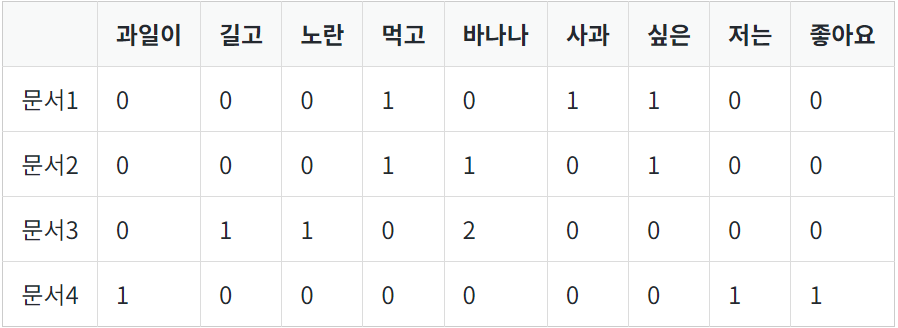

###4-4TF-IDF

각 단어에 대한 중요도를 계산할 수 있는 TF-IDF 가중치에 대해 알아봄

TF-IDF(Term Frequency-Inverse Document Frequency)  
TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취한것)을 사용해 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법.  
우선 DTM을 만든 후 , TF-IDF 가중치를 부여  
TF-IDF는   
1.문서의 유사도를 구하는 작업  
2.검색 시스템에 검색 결과 중요도   
3.문서 내에서 특정 단어의 중요도를 구하는 작업의 쓰일 수 있음  
TF-IDF는 TF와 IDF를 곱한 값


문서=d, 단어=t, 문서의 총 개수=n 이라 하면  

tf(d,t): 특정 문서 d에서의 특정 단어 t의 등장 횟수.  
df(t):특정 단어 t가 등장한 문서의 수.  
idf(t):df(t)에 반비례하는 수.  
->idf(t)=log(n/1+df(t))  

TF-IDF는 자주 등장하는 단어는 중요도 낮다고 판단  
책에서는 ln 사용하고 대부분의 패키지에서도 ln을 사용함  

그러고 TF와 IDF를 곱해주면 TF-IDF를 구할 수 있게 된다.  

즉 각 단어의 중요도를 구하는 IDF에서는 여러 문서들 중에 같은(겹치는) 단어가 적으면 그 단어의 중요도를 높다고 생각하고 가중치를 올려주는 역할을 한다고 볼 수 있다.

In [ ]:
#이제 파이썬과 사이킷런을 이용해 실습

import pandas as pd
from math import log

In [ ]:
docs=['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']
vocab=list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [ ]:
N=len(docs)

def tf(t,d):#tf(d,t): 특정 문서 d에서의 특정 단어 t의 등장 횟수.
  return d.count(t)

def idf(t):  #df(t)에 반비례하는 수
  df=0  #특정 단어 t가 등장하는 횟수
  for doc in docs:
    df+= t in doc #bolean 값 1 or 0 반환
    return log(N/(df+1))

def tfidf(t,d):
  return tf(t,d)*idf(t)

In [ ]:
result=[]

for i in range(N):
  result.append([])
  d=docs[i]
  for j in range(len(vocab)):
    t=vocab[j]
    result[-1].append(tf(t,d))

tf_=pd.DataFrame(result,columns=vocab)


In [ ]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result=[]
for j in range(len(vocab)):
  t=vocab[j]
  result.append(idf(t))

idf_=pd.DataFrame(result,index=vocab,columns=["IDF"])
idf_

,IDF
과일이,1.386294
길고,1.386294
노란,1.386294
먹고,0.693147
바나나,1.386294
사과,0.693147
싶은,0.693147
저는,1.386294
좋아요,1.386294


In [ ]:
result=[]
for i in range(N):
  result.append([])
  d=docs[i]
  for j in range(len(vocab)):
    t=vocab[j]
    result[-1].append(tfidf(t,d))

  tfidf_=pd.DataFrame(result, columns=vocab)

In [ ]:
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.693147,1.386294,0.000000,0.693147,0.000000,0.000000
2,0.000000,1.386294,1.386294,0.000000,2.772589,0.000000,0.000000,0.000000,0.000000
3,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.386294


TF-IDF를 보면 문서 2에서의 바나나가 문서 1에서의 바나나 보다 값이 높은데 이는 바나나가 이 문서에서 더 중요하게 쓰였다고 볼 수 있다. 왜냐하면 문서 1에서는 바나나가 1번 쓰이지만 2에서는 2번 쓰였기에 더 중요한 단어라고 생각할 수 있다.
TF-IDF를 파이썬과 pandas로 구현 해봄 하지만 이렇게 짠 코드는 조금의 문제가 있는데 1.ex)n=4인데 df(t)가 3이면 log(n/df(t)+1)=log(4/4)=log(1)=0 이 되는데 즉 idf=0이 된다.IDF의 값이 0이라면 가중치의 역할을 수행하지 못한다.

#5장 벡터의 유사도(Vector Similarity)

이번 장을 배우는 이유는 문서들의 유사도를 평가하기 위함이다. 기계가 계산하는 문서의 유사도의 성능은 단어들을 어떤 방법으로 수치화하였는지(DTM,Word2Vec),문서 간의 단어들의 차이를 어떤방법(유클리드 거리,코사인 유사도)로 알수 있다.

#6장 머신러닝(ML, Machine Learning)

##6.1 What is Machine Learning?

기존:data->progaming->해답  

머신러닝:(data,answer)->Learning->규칙성  

머신 러닝은 기존의 프로그래밍과는 접근 방식이 다르다. 머신러닝은 주어진 데이터로 부터 규칙성을 찾는것에 집중한다 이를 training or learning이라고 한다.

##6.2 머신 러닝 훓어보기

1.머신 러닝 모델의 평가

일반적으로 데이터를 훈련용,검증용,테스트용으로 분리한다  
Q:검증용이 무엇인가?  
A:모델이 훈련 데이터에 과적합이 되고 있는지 판단 or 하이퍼 파라미터의 조정을 위한 용도  ->모델의 성능을 조정하기 위한 데이터  

1.하이퍼파라미터(초매개변수): 모델의 성능에 영향을 주는 사람이 값을 지정하는 변수  ((ex)learning mate)
2.매개변수: 가중치와 편향. 학습을 하는 동안 값이 계속해서 변하는 수.  

2.Classification and Regression  
1.Binary Classification  
->주어진 입력에 대헤 2개의 선택지 중 하나를 고르는 경우  
2.Multi-class Classfication  
->주어진 입력에 대헤 여러가지 선택지 중 하나를 고르는 경우  
3.Regression  
->1,2 상황과는 달리 정해진 선택지가 아닌 어떠한 연속적인 값의 범위 내에서의 예측값이 나오는 경우이디ㅏ.  

3.SL,UL  
머신러닝은 크게 지도 학습, 비지도 학습, 강화 학습이 있다.  
1.지도 학습:lable(정답)과 함께 학습하는 것  
->자연어 처리는 대부분 지도 학습에 속함  
2.비지도 학습:데이터에 Label 없이 학습하는 것  
3.자기지도 학습(Self-Supervised Learning,SSL): Label이 없이 주어졌지만 스스로 Label을 만들어서 학습하는 경우를 자기지도 학습이라고 한다  

4.Sample and Feature  
많은 머신 러닝 문제가 1개 이상의 독립 변수 x를 가지고 종속 변수 y를 예측하는 문제이다.  
머신 러닝 모델 중 특히 인공 신경망은 독립 변수,종속 변수, 가중치, 편향 등을 행렬 연산을 통해 연산하는 경우가 많음.  
Sample:머신러닝 기준으로는 데이터, 행렬 기준으로는 하나의 행을 이라고 한다.  
feature:종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 이라고 부른다. 행렬 기준으로는 각 열에 해당

In [ ]:
import pandas as pd
data=[['TP','FN'],['FP','TN']]
df=pd.DataFrame(data,columns=['예측 참','예측 거짓'],index=['실제 참','실제 거짓'])
df

,예측 참,예측 거짓
실제 참,TP,FN
실제 거짓,FP,TN


5.혼돈 행렬  
TP와 TN은 정답이고 FP와FN은 틀렸다.(T가 True이고 F는 False임)  
1.정밀도(Precision) : True라고 분류한 것중 실제 True인 정도  
   TP/(TP+FP)  
2.재현율(Recall) : 재현율이란 실제 True인 것 중 모델이 True라고 예측한 정도  
TP/TP+FN  
3.정확도(Accuracy):전체 예측 결과 중에서 맞춘 경우의 수:
TP+TN/TP+FN+FP+TN  
= 예측 성공/예측 한 횟수  



6.Overfitting and Underfitting  
Overfitting:훈련 데이터를 과하게 학습하여 테스트 데이터나 실제 서비스에서 정확도가 높지 않은 상태  
Underfitting:훈련 데이터 조차 학습이 제대로 되지 않은 상황 훈련 자체가 부족한 상태이다.  
딥러닝을 할 때는 Overfitting을 막을 수 있는 Dropout,Early Stopping이 있다.  

테스트 데이터를 두 가지 용도로 분리하여 사용하는 것이 바람직하다.  
과적합 모니터링 and 하이퍼파라미터 튜닝을 위한 검증 데이터와 오직 성능 테스트를 위한 테스트 데이터로 나뉜다.  

딥러닝 과정
->  
Step 1. 주어진 데이터를 훈련 데이터, 검증 데이터, 테스트 데이터로 나눈다. 가령, 6:2:2 비율로 나눌 수 있다.  
Step 2. 훈련 데이터로 모델을 학습한다. (에포크 +1)  
Step 3. 검증 데이터로 모델을 평가하여 검증 데이터에 대한 정확도와 오차(loss)를 계산한다.  
Step 4. 검증 데이터의 오차가 증가하였다면 과적합 징후이므로 학습 종료 후 Step 5로 이동, 아니라면 Step 2.로 재이동한다.  
Step 5. 모델의 학습이 종료되었으니 테스트 데이터로 모델을 평가한다.




## 6.3 Linear Regression

알아야 하는 개념:Linear Regression,Logsitic Regression,Hypothesis,LossFunction,Gradient Descent  


y=wx + b  
x는 독립 변수 y는 종속 변수  y는 x값에 따라 값이 변하기 때문  
Linear Regression은 한 개 이상의 독립 변수 x와y의 선형 관계를 모델링한다.  

단순 선형 회귀
w는 weight의 약자로 가중치를 의미함
b는 bias의 약자로 편향을 의미함  
y=wx +b 로 x는 데이터 w,b를 우리가 컨트롤 하게 된다.

다중 선형 회귀  
y=w1x1+w2x2+....wnxn+b  
로 표현 되는데 w1,w2,wn은 각각 여러가지 특성들을 의미하게 되고 x1,x2,xn은 특성들의 data를 의미한다.  

선형 회귀에서 Hypothesis를 세운다. 어떤 w,b를 선택하느냐에 따라 그래프의 모양이 천차만별로 달라진다.  
그러므로 선형 회귀에서 해야할 일은 적절한 w,b를 찾아내야하는것이다.  

3.비용 함수(Cost function) : 평균 제곱 오차(MSE)  
Objective function,Cost function,Loss function->실제값과 예측값에 대한 오차  
Objective function은 함수의 값을 최소화 or 최대화하는 목적을 가진 함수
Cost function,Loss function->최소화하는데에 쓰이는 function  

비용함수는 단순히 오차를 표현하는 것이 아니라 예측값의 오차를 줄이는데에 최적화되어야 한다. 각각의 러닝들에는 다양한 문제들이 있고 적합한 비용 함수들을 사용되어야 한다. 회귀 문제의 경우에는 주로 MSE(평균 제곱 오차)가 사용된다.

수식적으로 단순히'오차=실제값-예측값'이라고 정의하면 오차가 음수일수도 양수 일수도 있어 오차가 누적되진 않는다. 그래서 모든 오차를 제곱하여 더하는 방식을 사용한다.

Optimizer:Gradient Descent  
optimizer:cost function을 최소화하는 w,b를 찾기 위한 작업을 수행하기 위한 알고리즘  
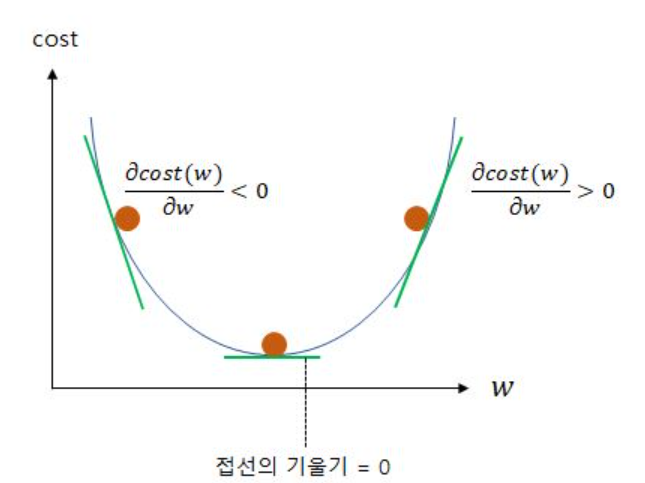
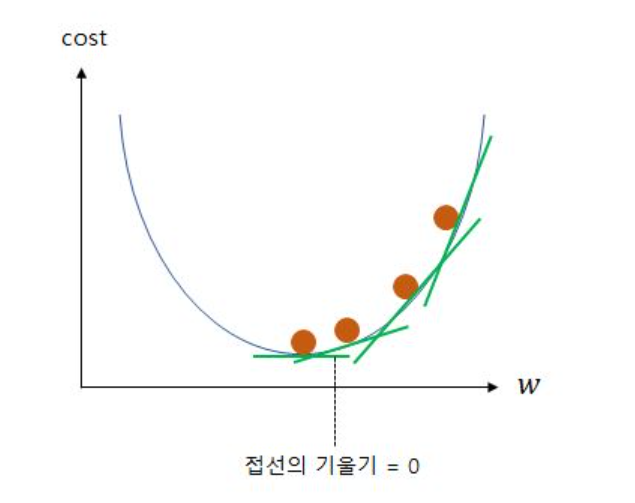  

점점 접선의 기울기가 0인쪽으로 가게 되어서 결국 cost의 값이 가장 적은곳으로 수렴하게 된다.

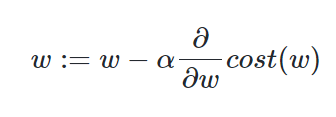
learning mate=a
a가 너무 커지면 기울기가 0으로 수렴하지 못하는 경우가 생길수 있고 a가 너무 작아지면 수렴하는곳으로 가는데 너무 오래 걸



##6.4 자동 미분

1.자동미분

In [ ]:
import tensorflow as tf

임의로 2w^2+5라는 식을 세우고 w에 대헤 미분

In [ ]:
w=tf.Variable(2.)

def f(w):
  y=w**2
  z=2*y+5
  return z

In [ ]:
with tf.GradientTape() as tape:
  z=f(w)

gradients=tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


미분값이 8임을 알 수 있다.  
이제 자동 미분을 이용한 선형 회귀 구현

In [ ]:
w=tf.Variable(4.0)
b=tf.Variable(1.0)

In [ ]:
@tf.function
def hypothesis(x):
  return w*x+b

x_test=[3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [ ]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))#두개의 차이값을 제곱을 해서 평균을 취한다

x=[1,2,3,4,5,6,7,8,9]#공부하는 시간
y=[11,22,33,44,53,66,77,87,95]#공부 시간당 성적

In [ ]:
optimizer=tf.optimizers.SGD(0.01)

In [ ]:
for i in range(301):
  with tf.GradientTape() as tape:
    y_pred=hypothesis(x)
    cost=mse_loss(y_pred,y)

  gradients=tape.gradient(cost,[w,b])

  optimizer.apply_gradients(zip(gradients,[w,b]))

  if i%10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(i, w.numpy(),b.numpy(),cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.6644 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.9769 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 : 1.9297 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.8844 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.8409 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.7991 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.7591 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.7206 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.6837 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.6483 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.6143 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.5817 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 : 1.5504 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 : 1.5204 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.4916 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.4639 | cost :

epoch의 횟수가 늘어남에 따라 cost가 줄어드는 것을 확인 할 수 있다.

케라스로 구현하는 방법

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model=Sequential()

model.add(Dense(1,input_dim=1,activation='linear'))

sgd=optimizers.SGD(lr=0.01)

model.compile(optimizer=sgd,loss='mse',metrics=['mse'])

model.fit(x,y,epochs=300)

1/1 [==============================] - 0s 286ms/step


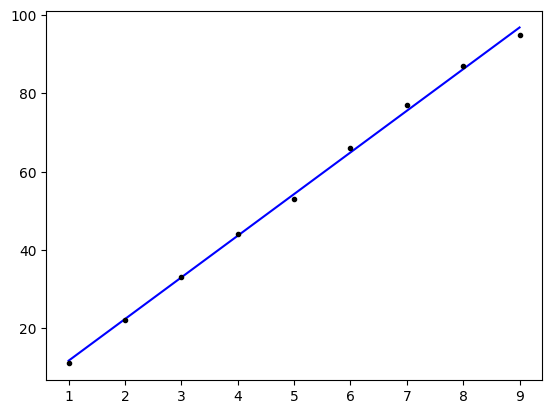

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,model.predict(x),'b',x,y,'k.')

점은 실제값이고, 선은 w와b를 SGD를 통해 추측한 값이다.

In [ ]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 146ms/step
[[102.159134]]


9.5시간을 공부하면 102점을 얻는다고 추측..

##6.5로지스틱 회귀

이진 분류 상황에서는 x,y의 형태가 알파벳의 s자 형태로 표현되는데, 이러한 x,y의 관계를 표현하기에는 s자 형태에 함수가 필요하다.
만약 y=wx+b의 직선을 사용할 경우, y값이 음의 무한대부터 양의 무한대와 같은 큰 수들도 가질 수 있는데 이는 적합하지 않다.

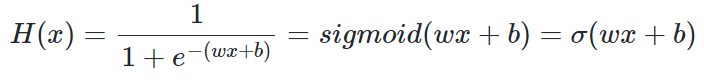

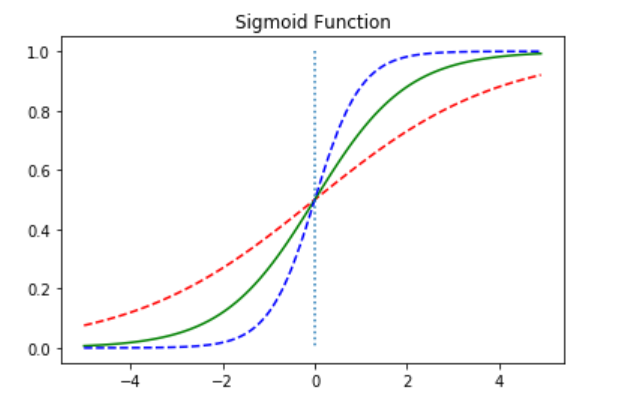

결국 w,b를 사용해서 그래프를 조정하는게 중요한것이다. y값이 0.5가 넘는 지점의 x값을 찾는것이 중요한것.  
대칭이동이라고 생각하면 b가 커지면 그래프가 왼쪽으로 이동하고 b가 작아지면 그래프가 오른쪽으로 이동함 w가 커지면 기울기 변화량이 커지므로 파란색 점선 처럼 되고 w가 작아지면 빨간색 점선처럼 기울기 변화량이 작아진다.



3. 비용함수 : 크로스 엔트로피


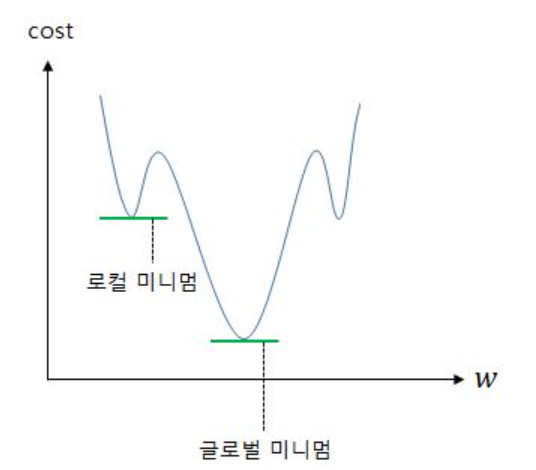

우리가 찾아야하는건 오차가 가장적은 최소값인데 SGD의 특성상 극솟값에서 갇혀버릴수도 있다.MSE는 로지스틱 회귀에서는 로컬 미니멈에 빠질 가능성이 높으므로 다른 cost function을 찾아야한다.  
로지스틱 회귀에서는 cost function으로는 cross-entropy를 사용한다.  


##6.6 로지스틱 회귀 실습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)


1/1 [==============================] - 0s 73ms/step


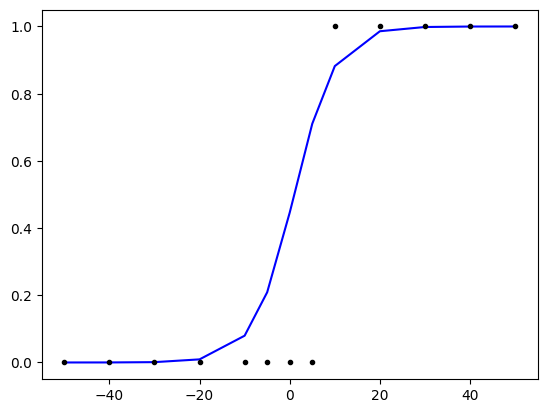

In [ ]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')


y값이 0.5이상인 지점의 x값이 들어오면 1을 반환 0.5 보다 작으면 0을 반환하게 된다.

##6.7 다중 입력에 대한 실습

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers


1. 다중 선형 회귀  
y를 결정하는데 독립 변수가 3개인 선형 회귀는  
H(X)=w1x1+w2x2+w3x3+b 로 표현된다.
X는 [x1,x2,x3]의 특성을 가진 벡터이다.

In [ ]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]])
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model=Sequential()
model.add(Dense(1,input_dim=3,activation='linear'))

sgd=optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])
model.fit(X,y,epochs=2000)

In [ ]:
print(model.predict(X))

1/1 [==============================] - 0s 22ms/step
[[72.93918]
 [81.97356]
 [72.08982]
 [57.11455]
 [33.80629]]


In [ ]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

1/1 [==============================] - 0s 33ms/step
[[57.91768]
 [56.05155]]


2.다중 로지스틱 회귀  
input_dimension=2 이다 그러면 H(X) 이렇게 표현된다
H(X)=sigmoid(w1x1+w2x2+b)


In [ ]:
X=np.array([[0,0],[0,1],[1,0],[0,2],[1,1],[2,0]])
y=np.array([0,0,0,1,1,1])

model=Sequential()
model.add(Dense(1,input_dim=2,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['binary_accuracy'])

model.fit(X,y,epochs=2000)

##6.8 벡터와 행렬 연산

벡터=크기와 방향을 가진 양  
파이썬에서는  
1차원, 배열 or 리스트  
2차원:2차원 배열 (가로줄은 행,세로줄은 열)  
3차원이상: 텐서(Tensor)  



In [ ]:
d=np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 0
텐서의 크기(shape) : ()


array안에 들어 있는 5 는 단순 스칼라 이므로 차원이 0이다.

In [ ]:
d=np.array([1,2,3,4])
print('텐서의 차원:',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원: 1
텐서의 크기(shape) : (4,)


1차원 텐서(벡터), 벡터에서는 4차원이지만 텐서에서는 1차원, 1D 텐서이다.
벡텅에서의 차원은 하나의 축에 놓인 원소의 개수, 텐서에서는 차원의 축의 개수

In [ ]:
d=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print('텐서의 차원:',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원: 2
텐서의 크기(shape) : (3, 4)


2차원 텐서(행렬)  
3개의 커다란 데이터,-> 커다란 데이터에는 4개의 작은 데이터

In [ ]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)


텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


##7. Deep Learning의 개요

Perceptron은 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘.

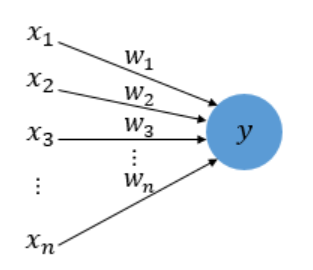

x는 입력 값 w는 가중치 y는 출력값이다, 그림안의 원은 인공 뉴런  
각각의 인공 뉴런에서 보내진 입력값 x는 각각의 가중치 w와 함께 종착지인 인공 뉴런에 전달 됨  
각각의 입력값에는 각각의 가중치가 존재하는데 가중치가 크면 클수록 해당 값이 중요한것을 의미.  
각각의 입력값과 그에 해당되는 가중치의 곱의 전체 합을 임계치라고 한다. Activation Function은 step Function을 사용한다.  
로지스틱 회귀 모델에서와의 차이는 활성화 함수밖에 없다.

단층 퍼셉트론(Single-Layer Perceptron)  
단층은 input layer 와 output layer 두개로 나누어져있다.  
초기의 단층 퍼셉트론은 간단한 XOR 게이트도 구현할 수 없는 부족한 인공신경망이라는 지적을 받음

##7.11 다층 퍼셉트론

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
texts=['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나','저는 과일이 좋아요']

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'먹고': 1, '싶은': 2, '바나나': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [ ]:
print(tokenizer.texts_to_matrix(texts, mode='count'))

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


DATASET and DATALOADER